In [47]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\joebe\Downloads\user_behavior_dataset.csv")

# Display the first few rows of the dataset
df.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [49]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values, if any
df = df.dropna()  # You could also fill with mean/median/mode if appropriate

# Convert categorical columns to numerical using one-hot encoding if necessary
df = pd.get_dummies(df, drop_first=True)


Missing values per column:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


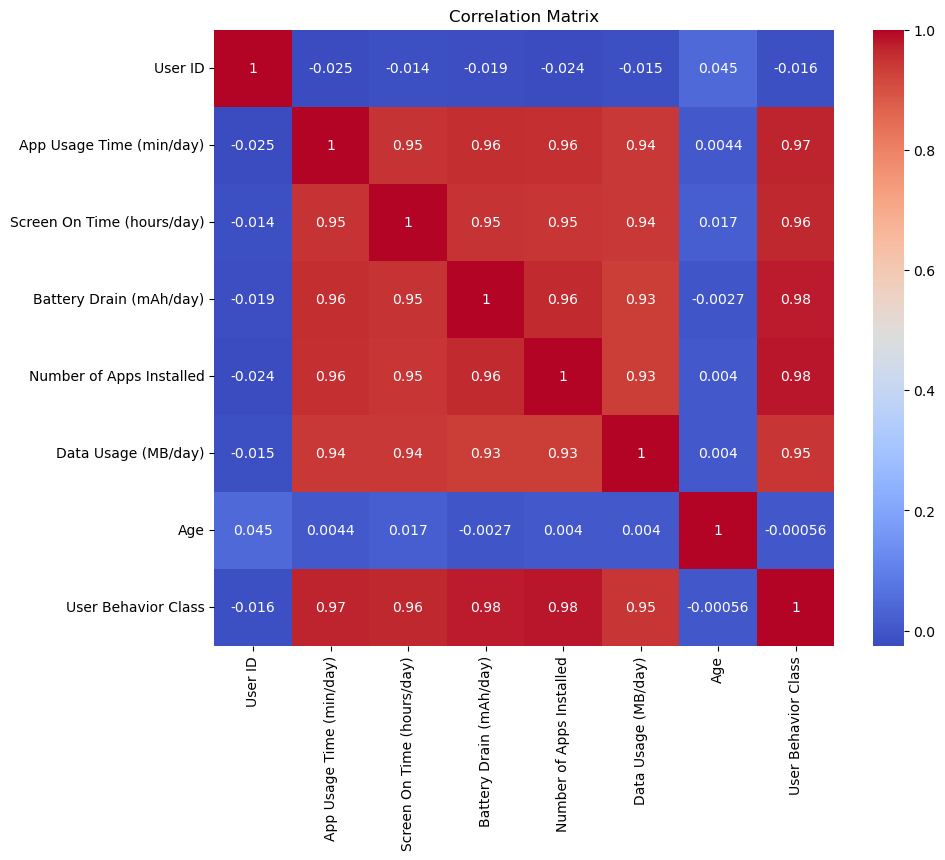

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\joebe\Downloads\user_behavior_dataset.csv")

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [63]:
# Display the column names to verify the correct target column name
print("Column names in the dataset:", df.columns)

# Assuming 'Sales' is the target, but update this if the name differs
target_column = 'Sales'  # Replace 'Sales' with the correct column name if different

# Define features and target
if target_column in df.columns:
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]               # Target
else:
    print(f"Error: '{target_column}' column not found in the dataset.")


Column names in the dataset: Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')
Error: 'Sales' column not found in the dataset.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Use the correct path to your dataset
file_path = r"C:\Users\joebe\Downloads\user_behavior_dataset.csv"  # Raw string format for Windows path

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully")
    print(df.head())  # Display the first few rows to ensure it's loaded correctly
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path.")

# Print column names to check the actual target column
print(df.columns)

# Define the features (X) and target (y) variables
X = df.drop(columns='User Behavior Class')  # Replace 'User Behavior Class' with your actual target column name
y = df['User Behavior Class']               # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")


Dataset loaded successfully
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47 

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Changed to LogisticRegression for classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("C:\\Users\\joebe\\Downloads\\user_behavior_dataset.csv")

# Display the column names to verify the correct target column
print("Column names in the dataset:")
print(df.columns)

# Clean up column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Update the target column to 'User Behavior Class' or another column as needed
target_column = 'User Behavior Class'  # Update this to your actual target column

# Check if the target column exists in the dataframe
if target_column in df.columns:
    # Define features and target
    X = df.drop(columns=[target_column])  # Features (all columns except the target)
    y = df[target_column]  # Target variable

    # Optionally, scale the features (if needed)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Scaling the features

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train the model (Logistic Regression for classification)
    model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # Output the evaluation results
    print("\nModel Evaluation:")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)
else:
    print(f"Error: The column '{target_column}' does not exist in the dataset.")


Column names in the dataset:
Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')


ValueError: could not convert string to float: 'Google Pixel 5'